In [ ]:
                                           DECISION TREE ASSIGNMENT

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

file_path = "heart_disease.xlsx"
description = pd.read_excel(file_path, sheet_name="Description")
heart_data = pd.read_excel(file_path, sheet_name="Heart_disease")

print("Description sheet:\n", description.head(), "\n")
print("Heart Disease Data:\n", heart_data.head(), "\n")


Description sheet:
         age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0... 

Heart Disease Data:
    age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect  

In [35]:
#Exploratory Data Analysis (EDA)
print("\nDataset Info:")
print(heart_data.info())
print("\nMissing Values:\n", heart_data.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None

Missing Values:
 age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype

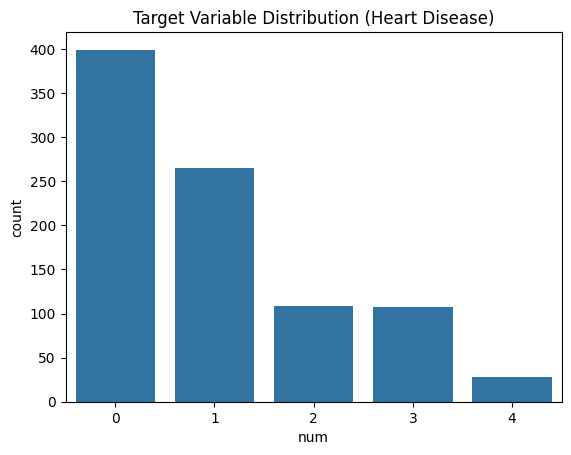

In [36]:
# Visualize class distribution
sns.countplot(x="num", data=heart_data)
plt.title("Target Variable Distribution (Heart Disease)")
plt.show()

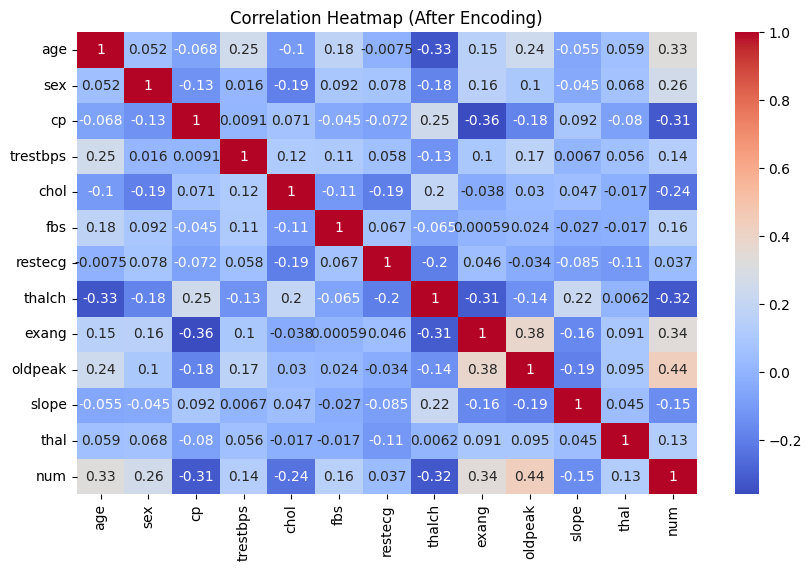

In [37]:
from sklearn.preprocessing import LabelEncoder
df_encoded = heart_data.copy()

for col in df_encoded.columns:
    if df_encoded[col].dtype == "object":  # encode string columns
        le = LabelEncoder()
        df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (After Encoding)")
plt.show()

In [38]:
#  Feature Engineering 
from sklearn.preprocessing import LabelEncoder
file_path = "heart_disease.xlsx"
description = pd.read_excel(file_path, sheet_name="Description")
heart_data = pd.read_excel(file_path, sheet_name="Heart_disease")
# Features and target
X = df.drop("num", axis=1)
y = df["num"]

# Convert num (0=no disease, 1-4=disease) 
y = y.apply(lambda x: 0 if x == 0 else 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Shape of training set:", X_train.shape)
print("Shape of testing set:", X_test.shape)

Shape of training set: (726, 12)
Shape of testing set: (182, 12)


In [39]:
#  Decision Tree Classification
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred = dt.predict(X_test)

# Evaluation
print("\n=== Default Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))




=== Default Decision Tree Performance ===
Accuracy: 0.7142857142857143
Precision: 0.75
Recall: 0.7352941176470589
F1 Score: 0.7425742574257426

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.69      0.68        80
           1       0.75      0.74      0.74       102

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.72      0.71      0.71       182



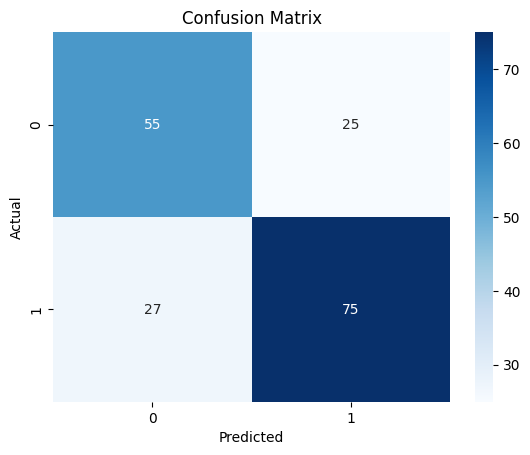

In [40]:
# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
# Hyperparameter Tuning
param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_



Best Parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [42]:
#  Evaluation of Tuned Model
y_pred_best = best_dt.predict(X_test)

print("\n=== Tuned Decision Tree Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))



=== Tuned Decision Tree Performance ===
Accuracy: 0.7142857142857143
Precision: 0.7604166666666666
Recall: 0.7156862745098039
F1 Score: 0.7373737373737373


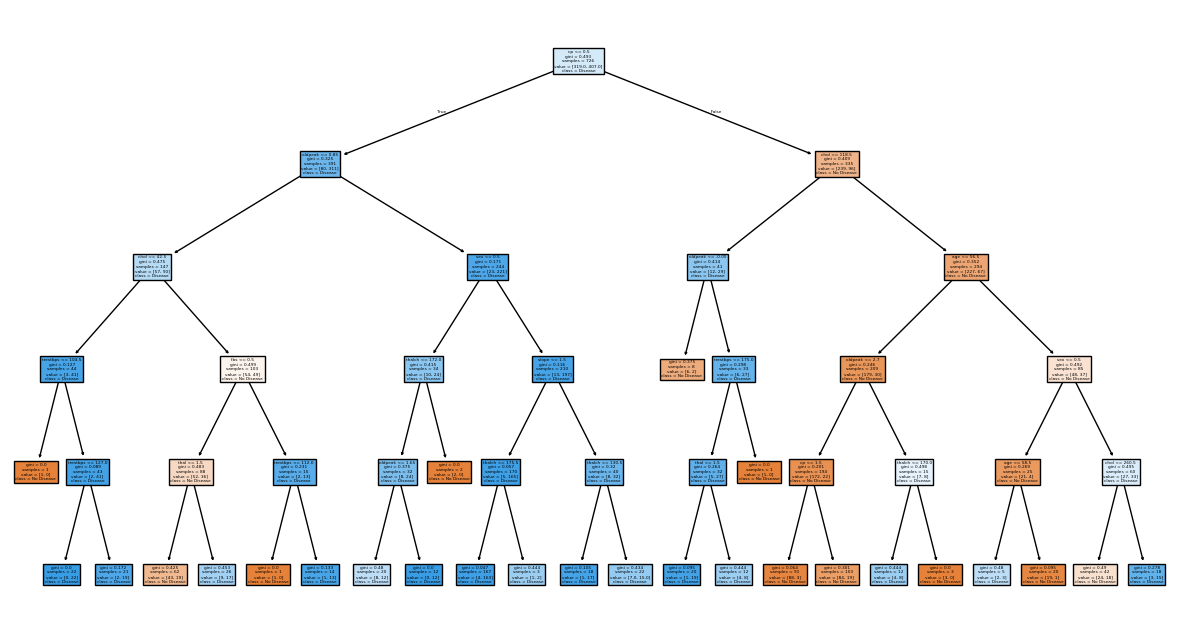

In [43]:
# Visualize Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(best_dt, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()

In [ ]:
INTERVIEW QUESTIONS
# 1.common hyperparameters in decision tree models
have several important hyperparameters that strongly affect their performance like accuracy,overfitting.
maximum depth of tree they effect more complex model 
maximum features: no of features considered for looking best split,smaller values tree may miss some patterns but reduces fitting.
minimum sample split: minimum no of samples required to split an internal and it has more splits,more comlex tree and risk of over loading.
EFFECTS: low depth,high samples prevents overfitting
high depth,low min samples prevents more complex model
max features controls randomness,smaller values reduce variance but increase bias.

In [ ]:
2.difference between label encoding and one-hot encoding
label encoding : it will assign a unique integer to each category value in categorical variable and transforms categorical data into
numeric format.
simple and efficient in transforming in categorical data.
suitable for ordinal categorical variables where order matters
it can mislead algorithms that assumes ordinal relationship between categories
it may not appropriate for nominal categorical variables with no instrinsic order.

one-hot encoding : it is a technique used to covert categorical variables into a binary format each value becomes a separate feature 
and binary value assigned to indicate the presence of category.
handles categorical variables with no ordinal relationship
prevents algorithm from assuming natural order between categories
result in high-dimensional feature space,especially with many unique categories
it lead to increase computational and overfitting.

In [6]:
import pandas as pd
import numpy as np
df = pd.read_excel("heart_disease.xlsx")
df

,age,Age in years
0,Gender,"Gender ; Male - 1, Female -0"
1,cp,Chest pain type
2,trestbps,Resting blood pressure
3,chol,cholesterol measure
4,fbs,(fasting blood sugar > 120 mg/dl) (1 = true; 0...
5,restecg,"ecg observation at resting condition, -- Val..."
6,thalch,maximum heart rate achieved
7,exang,exercise induced angina
8,oldpeak,ST depression induced by exercise relative to ...
9,slope,the slope of the peak exercise ST segment


In [7]:
print(df.columns)

Index(['age', 'Age in years'], dtype='object')


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           12 non-null     object
 1   Age in years  12 non-null     object
dtypes: object(2)
memory usage: 324.0+ bytes
None
